In [1]:
import torch
import torch.nn as nn
from torch.nn.functional import relu
import test

In [2]:
class UNet(nn.Module):
    def __init__(self, n_classes):
        super(UNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.convskip4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.max_pool1 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.convskip3 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.max_pool2 = nn.MaxPool2d(2, 2)
        
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.convskip2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.max_pool3 = nn.MaxPool2d(2, 2)
        
        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.convskip1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.max_pool4 = nn.MaxPool2d(2, 2)
        
        self.conv9 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1)
        
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.upconv1 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.upconv2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        
        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.upconv3 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.upconv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.upconv5 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.upconv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.upconv7 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.upconv8 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        
        self.output_conv = nn.Conv2d(64, n_classes, kernel_size=1)
        
    def forward(self, x):
        x = relu(self.conv1(x))
        xskip1 = relu(self.convskip4(x))
        x = self.max_pool1(xskip1)
        
        x = relu(self.conv3(x))
        xskip2 = relu(self.convskip3(x))
        x = self.max_pool2(xskip2)
        
        x = relu(self.conv5(x))
        xskip3 = relu(self.convskip2(x))
        x = self.max_pool3(xskip3)
        
        x = relu(self.conv7(x))
        xskip4 = relu(self.convskip1(x))
        x = self.max_pool4(xskip4)
        
        x = relu(self.conv9(x))
        x = relu(self.conv10(x))

        x = self.up1(x)
        x = torch.cat([x, xskip4], dim=1)
        x = self.upconv1(x)
        x = self.upconv2(x)
        
        x = self.up2(x)
        x = torch.cat([x, xskip3], dim=1)
        x = self.upconv3(x)
        x = self.upconv4(x)
        
        x = self.up3(x)
        x = torch.cat([x, xskip2], dim=1)
        x = self.upconv5(x)
        x = self.upconv6(x)
        
        x = self.up4(x)
        x = torch.cat([x, xskip1], dim=1)
        x = self.upconv7(x)
        x = self.upconv8(x)
        
        return self.output_conv(x)

Epoch 0/4
----------
LR 0.0001


/home/tuts/anaconda3/envs/transformer-env/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train: bce: 0.702464, dice: 0.990831, loss: 0.846647
val: bce: 0.673292, dice: 0.990768, loss: 0.832030
saving best model
0m 41s
Epoch 1/4
----------
LR 0.0001
train: bce: 0.651130, dice: 0.990906, loss: 0.821018
val: bce: 0.606124, dice: 0.990899, loss: 0.798511
saving best model
0m 38s
Epoch 2/4
----------
LR 0.0001
train: bce: 0.557231, dice: 0.991179, loss: 0.774205
val: bce: 0.412441, dice: 0.991968, loss: 0.702205
saving best model
0m 38s
Epoch 3/4
----------
LR 0.0001
train: bce: 0.215951, dice: 0.995014, loss: 0.605483
val: bce: 0.172531, dice: 0.994454, loss: 0.583493
saving best model
0m 39s
Epoch 4/4
----------
LR 0.0001
train: bce: 0.137557, dice: 0.994999, loss: 0.566278
val: bce: 0.055269, dice: 0.997512, loss: 0.526390
saving best model
0m 38s
Best val loss: 0.526390
(3, 6, 192, 192)


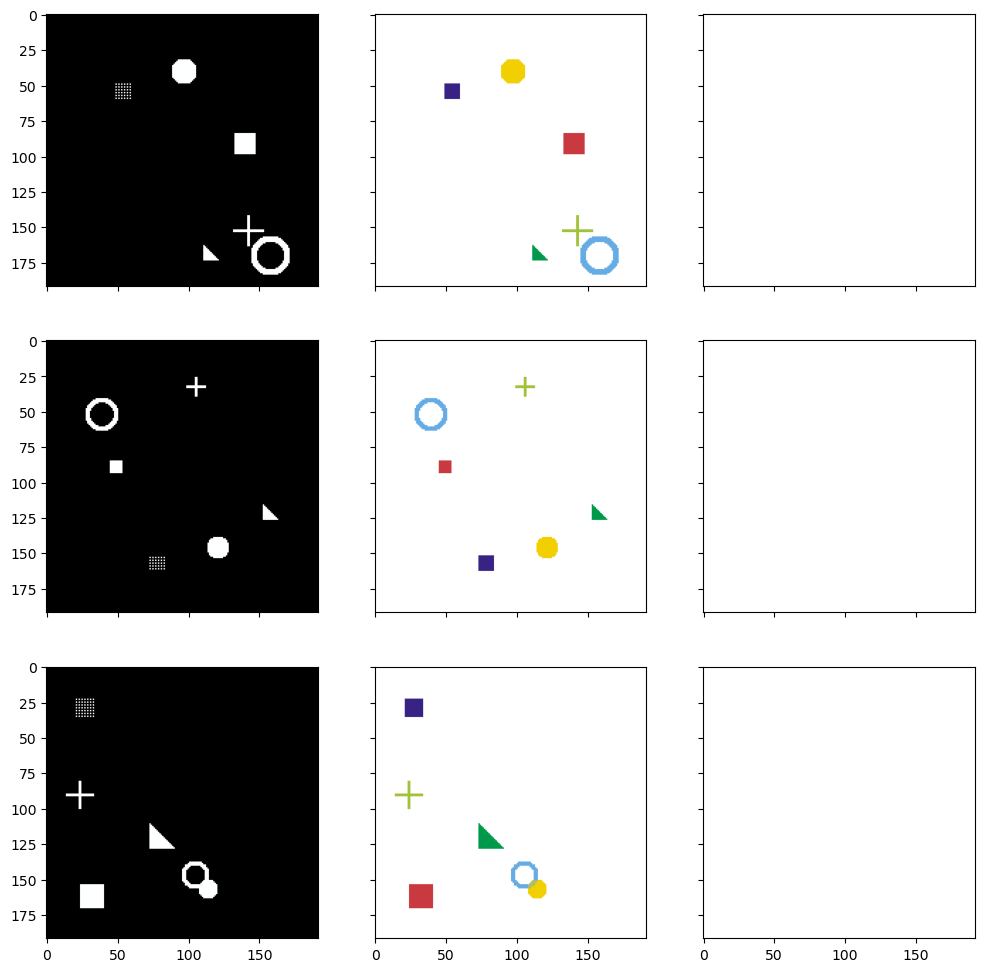

In [3]:
test.run(UNet)